## 1. To install pandas-datareader package, use the following command from the command prompt window (terminal window on Mac):
     conda install pandas-datareader

#### Done.

## 2. Download the adjusted close price for AAPL, INTC, EBAY and AMZN for the last 60 months.

#### I had many issues downloading the prices for the 4 stocks from the available sources online so I am using the 4 csv files provided in the assignment.

In [236]:
#Setup
import numpy as np
import pandas as pd

#Used later for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

In [237]:
#Read and clean up AAPL stock data
aapl = pd.read_csv(r'C:\Users\jessi\OneDrive\Documents\UofT SCS - 3250\Modules\Assignments\Assignment 3\3250_Assignment 3_aapl.csv',
                   parse_dates = ['Date'],
                   index_col = 'Date')
aapl = aapl.rename(columns = {'Adj Close':'AAPL'})
aapl = aapl.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
print(aapl)  

                  AAPL
Date                  
2013-02-28   47.371712
2013-03-01   46.198692
2013-03-04   45.080402
2013-03-05   46.270584
2013-03-06   45.682465
...                ...
2018-02-22  172.500000
2018-02-23  175.500000
2018-02-26  178.970001
2018-02-27  178.389999
2018-02-28  178.119995

[1260 rows x 1 columns]


In [238]:
#Read and clean up AMAZON stock data
amzn = pd.read_csv(r'C:\Users\jessi\OneDrive\Documents\UofT SCS - 3250\Modules\Assignments\Assignment 3\3250_Assignment 3_amzn.csv',
                   parse_dates = ['Date'],
                   index_col = 'Date')
amzn = amzn.rename(columns = {'Adj Close':'AMZN'})
amzn = amzn.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
print(amzn)  

                   AMZN
Date                   
2013-02-28   264.269989
2013-03-01   265.739990
2013-03-04   273.109985
2013-03-05   275.589996
2013-03-06   273.790009
...                 ...
2018-02-22  1485.339966
2018-02-23  1500.000000
2018-02-26  1521.949951
2018-02-27  1511.979980
2018-02-28  1512.449951

[1260 rows x 1 columns]


In [239]:
#Read and clean up EBAY stock data
ebay = pd.read_csv(r'C:\Users\jessi\OneDrive\Documents\UofT SCS - 3250\Modules\Assignments\Assignment 3\3250_Assignment 3_ebay.csv',
                   parse_dates = ['Date'],
                   index_col = 'Date')
ebay = ebay.rename(columns = {'AdjClose':'EBAY'})
ebay = ebay.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'ExDividend', 'SplitRatio', 'AdjOpen', 'AdjHigh', 'AdjLow', 'AdjVolume'], axis=1)
print(ebay)

                 EBAY
Date                 
2018-02-28  42.860000
2018-02-27  43.150000
2018-02-26  43.830000
2018-02-23  43.680000
2018-02-22  42.830000
...               ...
2013-03-06  21.075308
2013-03-05  21.740181
2013-03-04  21.826733
2013-03-01  21.598552
2013-02-28  21.523802

[1259 rows x 1 columns]


In [240]:
#Read and clean up INTC stock data
intc = pd.read_csv(r'C:\Users\jessi\OneDrive\Documents\UofT SCS - 3250\Modules\Assignments\Assignment 3\3250_Assignment 3_INTC.csv',
                   parse_dates = ['Date'],
                   index_col = 'Date')
intc = intc.rename(columns = {'AdjClose':'INTC'})
intc = intc.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'ExDividend', 'SplitRatio', 'AdjOpen', 'AdjHigh', 'AdjLow', 'AdjVolume'], axis=1)
print(intc)  

                 INTC
Date                 
2018-02-28  49.290000
2018-02-27  49.910000
2018-02-26  49.110000
2018-02-23  47.730000
2018-02-22  45.800000
...               ...
2013-03-06  18.610257
2013-03-05  18.404902
2013-03-04  18.199548
2013-03-01  17.994193
2013-02-28  17.865846

[1258 rows x 1 columns]


In [241]:
#Merge all Adjusted Close Prices for the 4 stocks
adjclose_merged = aapl.merge(amzn, how='left', left_on='Date', right_on='Date').merge(ebay, how='left', left_on='Date', right_on='Date').merge(intc, how='left', left_on='Date', right_on='Date')
print(adjclose_merged)

                  AAPL         AMZN       EBAY       INTC
Date                                                     
2013-02-28   47.371712   264.269989  21.523802  17.865846
2013-03-01   46.198692   265.739990  21.598552  17.994193
2013-03-04   45.080402   273.109985  21.826733  18.199548
2013-03-05   46.270584   275.589996  21.740181  18.404902
2013-03-06   45.682465   273.790009  21.075308  18.610257
...                ...          ...        ...        ...
2018-02-22  172.500000  1485.339966  42.830000  45.800000
2018-02-23  175.500000  1500.000000  43.680000  47.730000
2018-02-26  178.970001  1521.949951  43.830000  49.110000
2018-02-27  178.389999  1511.979980  43.150000  49.910000
2018-02-28  178.119995  1512.449951  42.860000  49.290000

[1260 rows x 4 columns]


Text(0, 0.5, 'Adjusted Close')

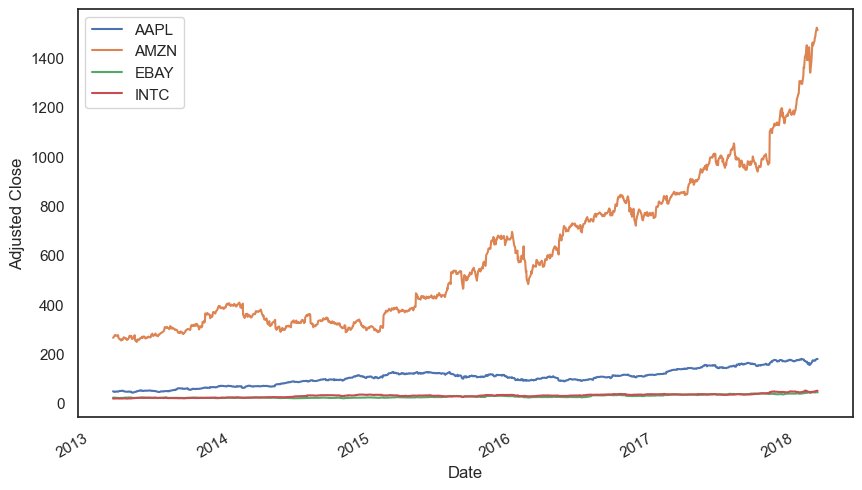

In [242]:
#Plot and examine all Adjusted Close Prices for the 4 stocks
adjclose_merged.plot(figsize=(10,6))
plt.ylabel('Adjusted Close')

## 3. Select the adjusted monthend close price for each of the stocks.

In [243]:
#Here I am resampling to Business Month-End for the last 60 months of data
adjclose_merged = adjclose_merged.resample('BM').last()
adjclose_merged

,AAPL,AMZN,EBAY,INTC
Date,,,,
2013-02-28,47.371712,264.269989,21.523802,17.865846
2013-03-29,47.506943,266.489990,21.331029,18.682986
2013-04-30,47.519821,253.809998,20.611077,20.492673
2013-05-31,50.594505,269.200012,21.283819,20.970127
2013-06-28,44.609531,277.690002,20.347488,20.926943
...,...,...,...,...
2017-10-31,167.750549,1105.280029,37.640000,44.962774
2017-11-30,171.152191,1176.750000,34.670000,44.840000
2017-12-29,168.542831,1169.469971,37.740000,46.160000


Text(0, 0.5, 'Adjusted Month-End Close')

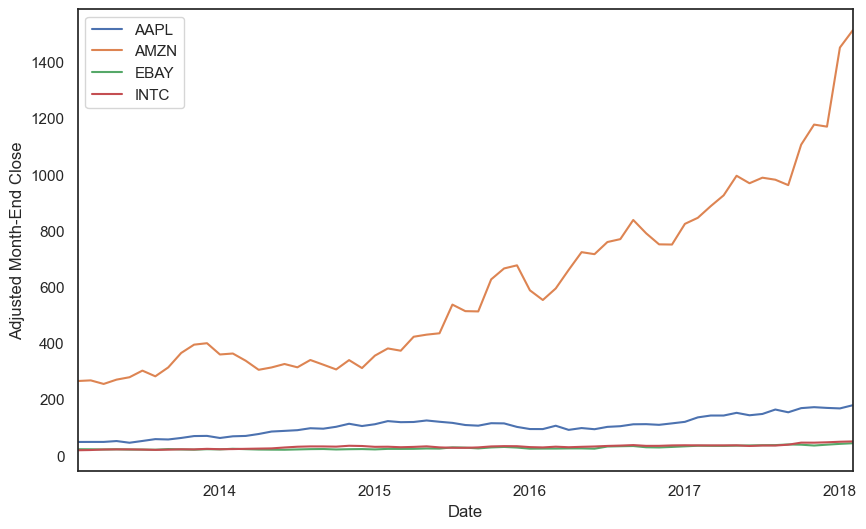

In [244]:
#Plot and examine all Adjusted Month-End Close prices for the 4 stocks
adjclose_merged.plot(figsize=(10,6))
plt.ylabel('Adjusted Month-End Close')

## 4. Use pandas autocorrelation_plot() function to plot the autocorrelation of the month-end close prices of each of the stocks.  Are they autocorrelated?  Why or why not?

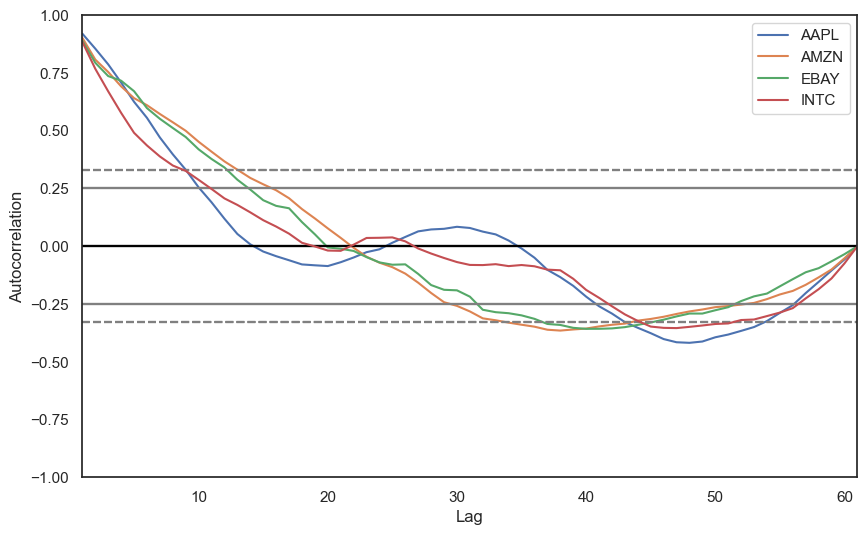

In [245]:
#Plot and examine the autocorrelation of the Adjusted Month-End Close prices of the 4 stocks
plt.figure(figsize=(10,6))
for i in adjclose_merged.columns:
    pd.plotting.autocorrelation_plot(adjclose_merged[i],label=i)

#### Looking at the autocorrelation plot, it shows that the time series for the four stocks is non-random, beause some of the autocorrelations are significantly non-zero. Therefore there is a high autocorrelation up until about Lag = 10. From Lag = 10 and onwards, there is no longer autocorrelation between the stocks as they are now within the 95-99% confidence intervals (negative autocorrelation, indicating random time series). From Week 1 to around 10 weeks, autocorrelation values are outside of the 95% confidence interval showing strong and significant autocorrelations.

## 5. Calculate the monthly return over the period for each stock using the “shift trick” on the lecture slide titled Shifting (Note: you should end up with a time series 59 months long)

In [246]:
#Calculate monthly returns using shift trick
month_return = adjclose_merged / adjclose_merged.shift(1) - 1
print(month_return)

                AAPL      AMZN      EBAY      INTC
Date                                              
2013-02-28       NaN       NaN       NaN       NaN
2013-03-29  0.002855  0.008401 -0.008956  0.045738
2013-04-30  0.000271 -0.047581 -0.033751  0.096863
2013-05-31  0.064703  0.060636  0.032640  0.023299
2013-06-28 -0.118293  0.031538 -0.043993 -0.002059
...              ...       ...       ...       ...
2017-10-31  0.096808  0.149717 -0.021321  0.194590
2017-11-30  0.020278  0.064662 -0.078905 -0.002731
2017-12-29 -0.015246 -0.006187  0.088549  0.029438
2018-01-31 -0.010636  0.240639  0.075252  0.042894
2018-02-28  0.068185  0.042429  0.056185  0.023889

[61 rows x 4 columns]


In [247]:
#Drop N/As
month_return = month_return.dropna()
print(month_return)

                AAPL      AMZN      EBAY      INTC
Date                                              
2013-03-29  0.002855  0.008401 -0.008956  0.045738
2013-04-30  0.000271 -0.047581 -0.033751  0.096863
2013-05-31  0.064703  0.060636  0.032640  0.023299
2013-06-28 -0.118293  0.031538 -0.043993 -0.002059
2013-07-31  0.141225  0.084735 -0.000580 -0.036938
2013-08-30  0.128473 -0.067193 -0.032888 -0.048822
2013-09-30 -0.021489  0.112677  0.116123  0.042812
2013-10-31  0.096382  0.164374 -0.055292  0.067580
2013-11-29  0.108898  0.081284 -0.041548 -0.016624
2013-12-31  0.008902  0.013135  0.086006  0.088716
2014-01-31 -0.107697 -0.100554 -0.030347 -0.054517
2014-02-28  0.096906  0.009507  0.104699  0.018617
2014-03-31  0.019953 -0.071058 -0.060065  0.042569
2014-04-30  0.099396 -0.095847 -0.061731  0.033935
2014-05-30  0.116113  0.027685 -0.021223  0.032405
2014-06-30  0.027662  0.039130 -0.013207  0.131040
2014-07-31  0.028731 -0.036302  0.055334  0.096764
2014-08-29  0.077509  0.083230 

## 6. Plot the autocorrelation of the monthly returns.  Are they autocorrelated?  Why or why not?

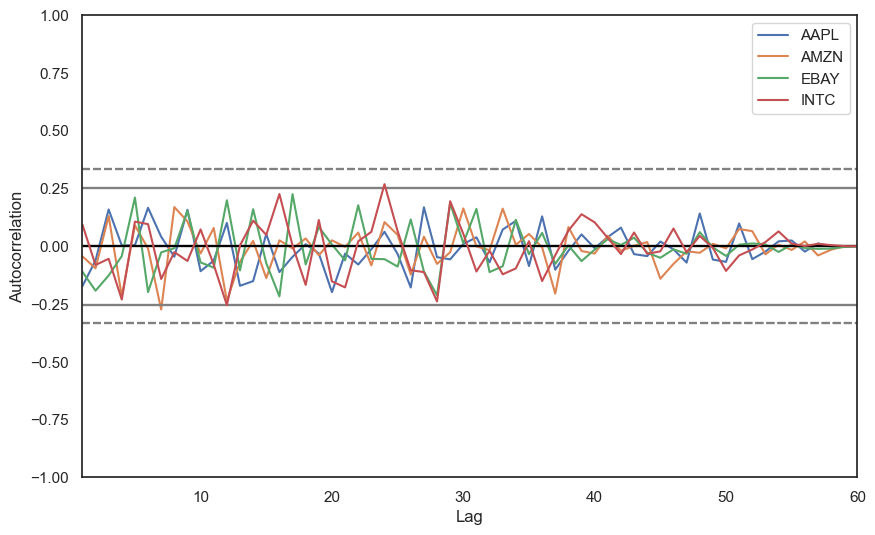

In [248]:
#Plot and examine the autocorrelation of the monthly returns for the 4 stocks
plt.figure(figsize=(10,6))
for i in month_return.columns:
    pd.plotting.autocorrelation_plot(month_return[i],label=i)

#### By looking at this autocorrelation plot we can determine that the monthly returns are not autocorrelated as most of the stocks are within the 95% confidence interval. It is interesting to see that from about Lag = 40 weeks and onwards the autocorrelations become increasingly near zero suggesting that stocks tend to be more cyclical in nature. 

## 7. OPTIONAL: Visualize the correlation between the returns of all pairs of stocks using a scatterplot matrix. (1 bonus mark)

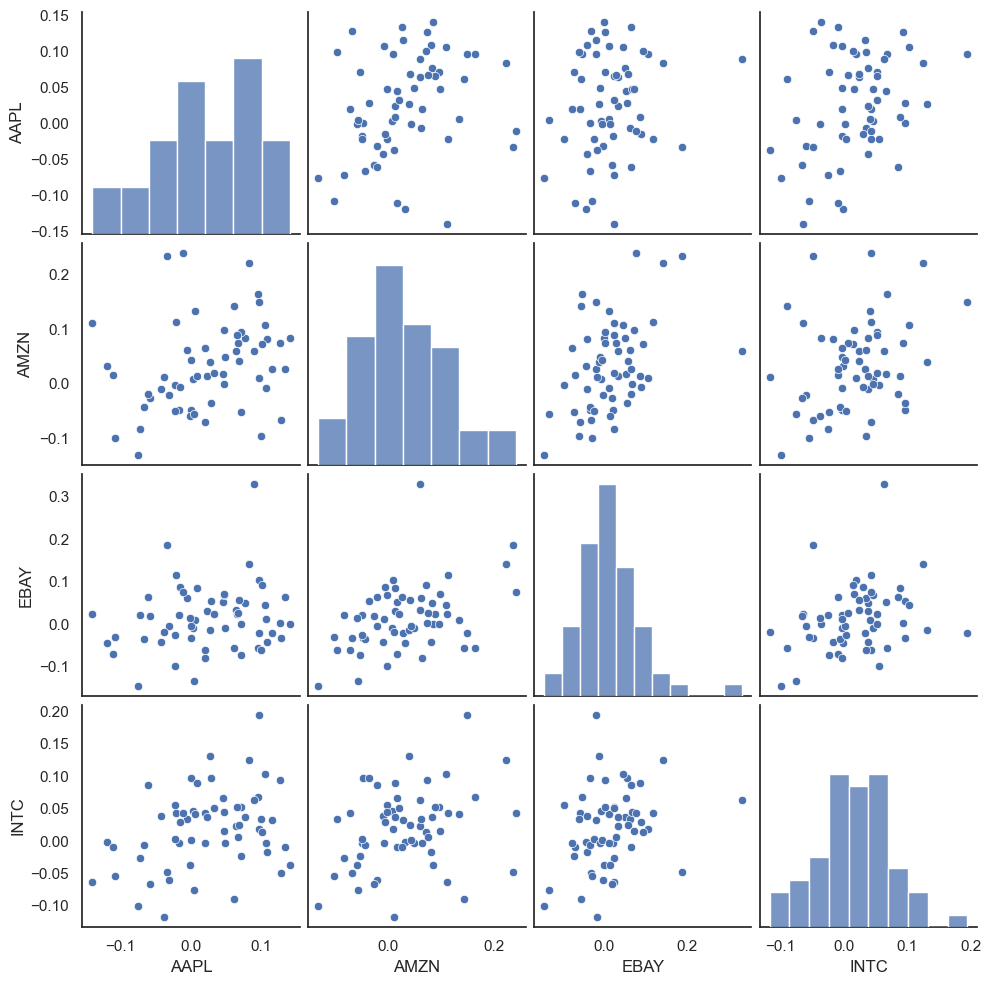

In [249]:
#Visualize correlation between stock return pairs using scatterplot matrix
sns.set(style="white")

sns.pairplot(month_return)

## 8. OPTIONAL: Following the instructions in the article The Glowing Python visualize the correlation of the returns of all pairs of stocks. (2 bonus marks)

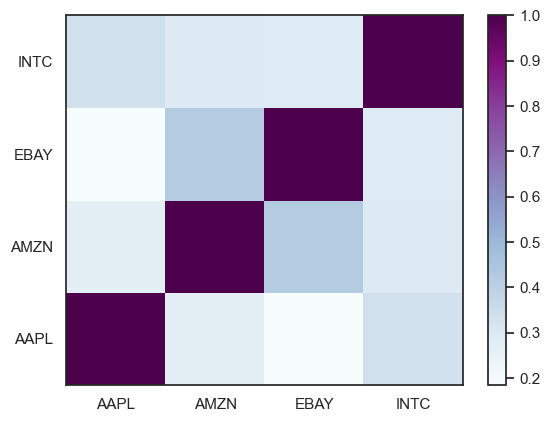

In [250]:
#Visualize correlation between stock return pairs using Glowing Python method
from numpy import corrcoef, arange
from pylab import pcolor, show, colorbar, xticks, yticks

R = corrcoef(month_return.T)
pcolor(R,cmap='BuPu')
colorbar()
yticks(arange(0.5,4.5),month_return.columns)
xticks(arange(0.5,4.5),month_return.columns)
show()